In [18]:
from ast import literal_eval

import pandas as pd

pitch_symbol = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

df = pd.read_csv("songs.csv")
# ignore songs that have no tags
df = df[df["tags"].notna()]

# turn tags from strings into a list of strings
df["artist_genres"] = df["artist_genres"].apply(literal_eval)
df["tags"] = df["tags"].apply(literal_eval)
df.columns

Index(['name', 'duration', 'artist_genres', 'artist_names', 'acousticness',
       'loudness', 'energy', 'danceability', 'mode', 'instrumentalness',
       ...
       'B_90', 'B_91', 'B_92', 'B_93', 'B_94', 'B_95', 'B_96', 'B_97', 'B_98',
       'B_99'],
      dtype='object', length=1240)

In [2]:
df.iloc[:20, :25]

,name,duration,artist_genres,artist_names,acousticness,loudness,energy,danceability,mode,instrumentalness,...,tags,C_max,C_min,C#_max,C#_min,D_max,D_min,D#_max,D#_min,E_max
0,Life Rolls On,219106,"[reggae fusion, reggae rock]",['Slightly Stoopid'],0.001630,-6.531,0.7490,0.644,0.0,0.863000,...,"[rock, misc]",1.0,0.002,1.0,0.002,1.0,0.003,1.0,0.008,1.0
1,I Kissed A Girl,179640,"[dance pop, pop]",['Katy Perry'],0.002230,-3.173,0.7600,0.699,1.0,0.000000,...,[misc],1.0,0.019,1.0,0.013,1.0,0.013,1.0,0.015,1.0
2,Best Life (feat. Chance The Rapper),284855,"[chicago rap, conscious hip hop, dance pop, hi...","['Cardi B', 'Chance the Rapper']",0.287000,-7.438,0.6250,0.620,1.0,0.000000,...,"[hip-hop, misc]",1.0,0.015,1.0,0.011,1.0,0.019,1.0,0.011,1.0
3,IV. Sweatpants,180675,"[hip hop, atl hip hop, rap]",['Childish Gambino'],0.154000,-9.330,0.4700,0.710,0.0,0.000000,...,[misc],1.0,0.002,1.0,0.005,1.0,0.002,1.0,0.002,1.0
4,Waiting For Love,228750,"[dance pop, pop, pop rap, edm, pop dance]",['Avicii'],0.299000,-3.798,0.7500,0.575,0.0,0.000000,...,[misc],1.0,0.004,1.0,0.008,1.0,0.008,1.0,0.007,1.0
5,Through My Skin,330468,"[tech house, deep tech house, bulgarian electr...",['Metodi Hristov'],0.002400,-8.690,0.5980,0.777,0.0,0.581000,...,[misc],1.0,0.007,1.0,0.012,1.0,0.008,1.0,0.001,1.0
6,Sk8er Boi,204000,"[dance pop, pop, post-teen pop, canadian pop, ...",['Avril Lavigne'],0.000068,-4.417,0.9000,0.487,1.0,0.000000,...,"[rock, misc]",1.0,0.024,1.0,0.018,1.0,0.012,1.0,0.005,1.0
7,Say,215653,[],['Symon'],0.360000,-3.433,0.8600,0.778,0.0,0.000213,...,[misc],1.0,0.009,1.0,0.005,1.0,0.004,1.0,0.003,1.0
8,Look Over Your Shoulder (feat. Kendrick Lamar),248810,"[conscious hip hop, west coast rap, hip pop, h...","['Kendrick Lamar', 'Busta Rhymes']",0.043800,-4.345,0.8870,0.600,1.0,0.000000,...,"[hip-hop, misc]",1.0,0.013,1.0,0.012,1.0,0.012,1.0,0.007,1.0
9,Bandsville,113996,"[dark trap, canadian hip hop, vapor trap, minn...","['bbno$', 'Yung Gravy']",0.130000,-8.339,0.3900,0.833,1.0,0.000007,...,"[misc, hip-hop]",1.0,0.003,1.0,0.002,1.0,0.001,1.0,0.002,1.0


In [19]:
tolower = lambda s: s.lower()
flatmap = lambda list_of_lists: [item for l in list_of_lists for item in l]
tags = pd.Series(flatmap(df[~df["tags"].isna()]["tags"].values.tolist())).apply(tolower)
ratios = [ratio for ratio in tags.value_counts(normalize=True).to_list()]

# Data Visualization

## Spotify Features

Here we plot the correlation matrix of the features we selected from the spotify api.

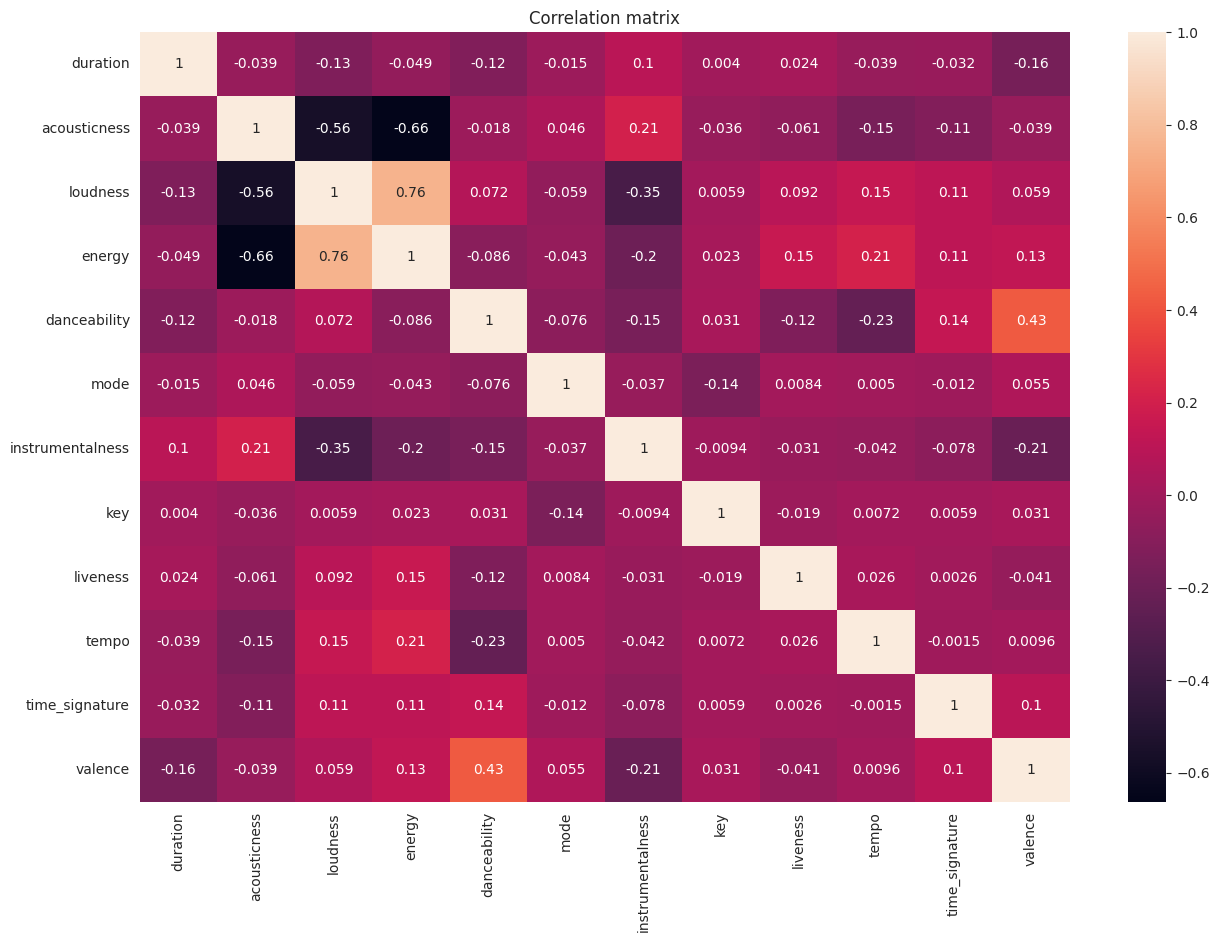

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.iloc[:, :16].corr(numeric_only=True), annot=True)
plt.title("Correlation matrix")
plt.show()

We only plot the spotify features here, since we have way too many columns.
This is because we decided to use the pitches of every note as a feature. The problem is, that the amount of pitches is proportional to the length
of the song. To reduce the amount of features, we preprocessed the pitches per note down to 100 values per note. Though this still leaves us with around 1240 feature columns.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11103 entries, 0 to 11102
Columns: 1240 entries, name to B_99
dtypes: float64(1235), int64(1), object(4)
memory usage: 105.1+ MB


## Pitches

Since we have over ~100 different tags, we decided to take a closer look at the following tags, to
 get some sense fo our features, we decided to take a closer look at 5 different tags.


In [22]:
df_by_tags = {
    "rock": df[df["tags"].apply(lambda x: "rock" in x)],
    "metal": df[df["tags"].apply(lambda x: "metal" in x)],
    "hip-hop": df[df["tags"].apply(lambda x: "hip-hop" in x)],
#    "jazz": df[df["tags"].apply(lambda x: "jazz" in x)],
#    "electro": df[df["tags"].apply(lambda x: "electro" in x)],
#    "indie": df[df["tags"].apply(lambda x: "indie" in x)],
    "edm": df[df["tags"].apply(lambda x: "edm" in x)],
#    "classic": df[df["tags"].apply(lambda x: "classic" in x)],
    "piano": df[df["tags"].apply(lambda x: "piano" in x)],
}

rock_df = df_by_tags["rock"]

### Rock

Here we check if the correlation matrix of just the songs tagged with `rock` is different from the correlation matrix of all songs.
But as we can see, it looks pretty much the same.

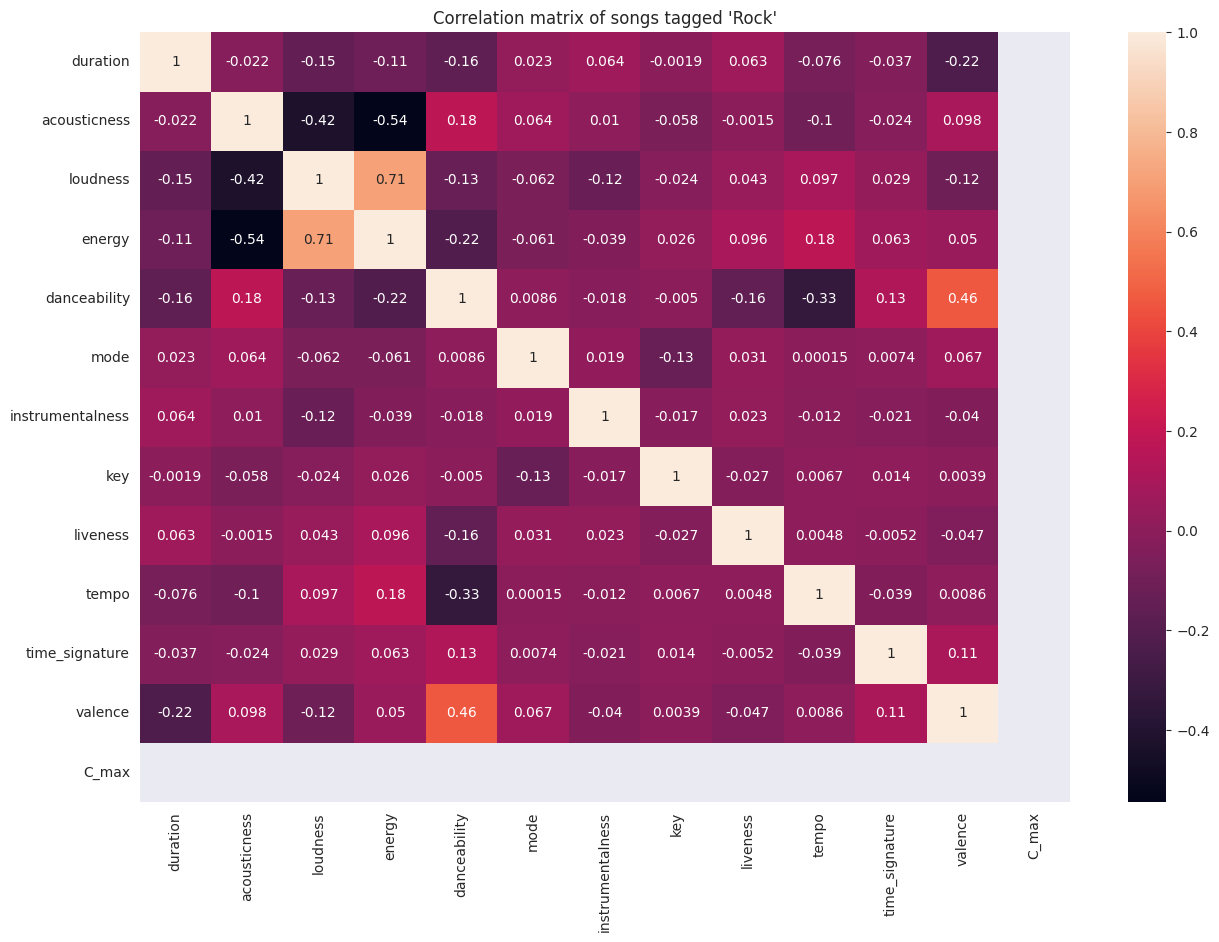

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(rock_df.iloc[:, :17].corr(numeric_only=True), annot=True)
plt.title("Correlation matrix of songs tagged 'Rock'")
plt.show()

This plot show the avg pitches of the songs tagged with `rock`.

Text(0.5, 1.0, "Avg pitches for songs tagged with 'rock'")

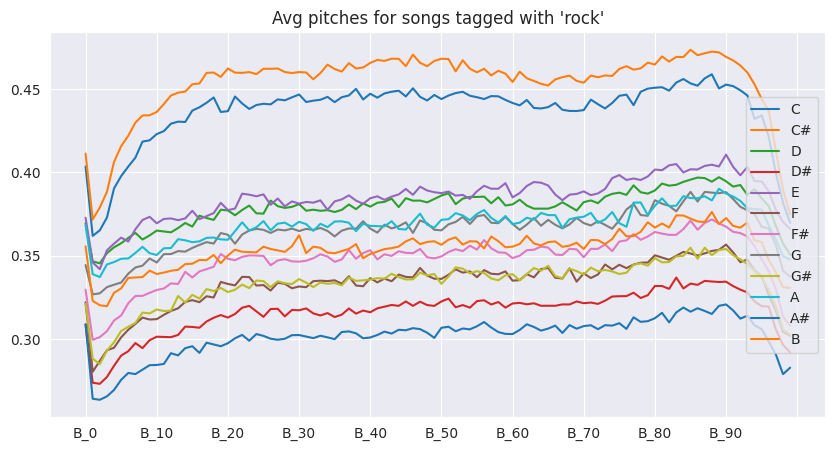

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_xticks(range(0, 101, 10))
#ax.set_xticklabels([i for i in range(0, 101, 10)])
for i, note in enumerate(pitch_symbol):
    #cur_ax.set_title(note)
    curr_df = rock_df[[*[note + "_" + str(i) for i in range(0, 100)]]].mean().transpose()
    curr_df.plot(ax=ax)
ax.legend(pitch_symbol, loc="center right")
ax.set_title("Avg pitches for songs tagged with 'rock'")

## Plots per tag
### Pitches

In order to compare the information above with other tags, we decided to plot the pitches separately and use the tags as the legend.

And as we can see from the averages, `edm` is very different from the other tags. The `metal` tag has a very strong presents in E and B

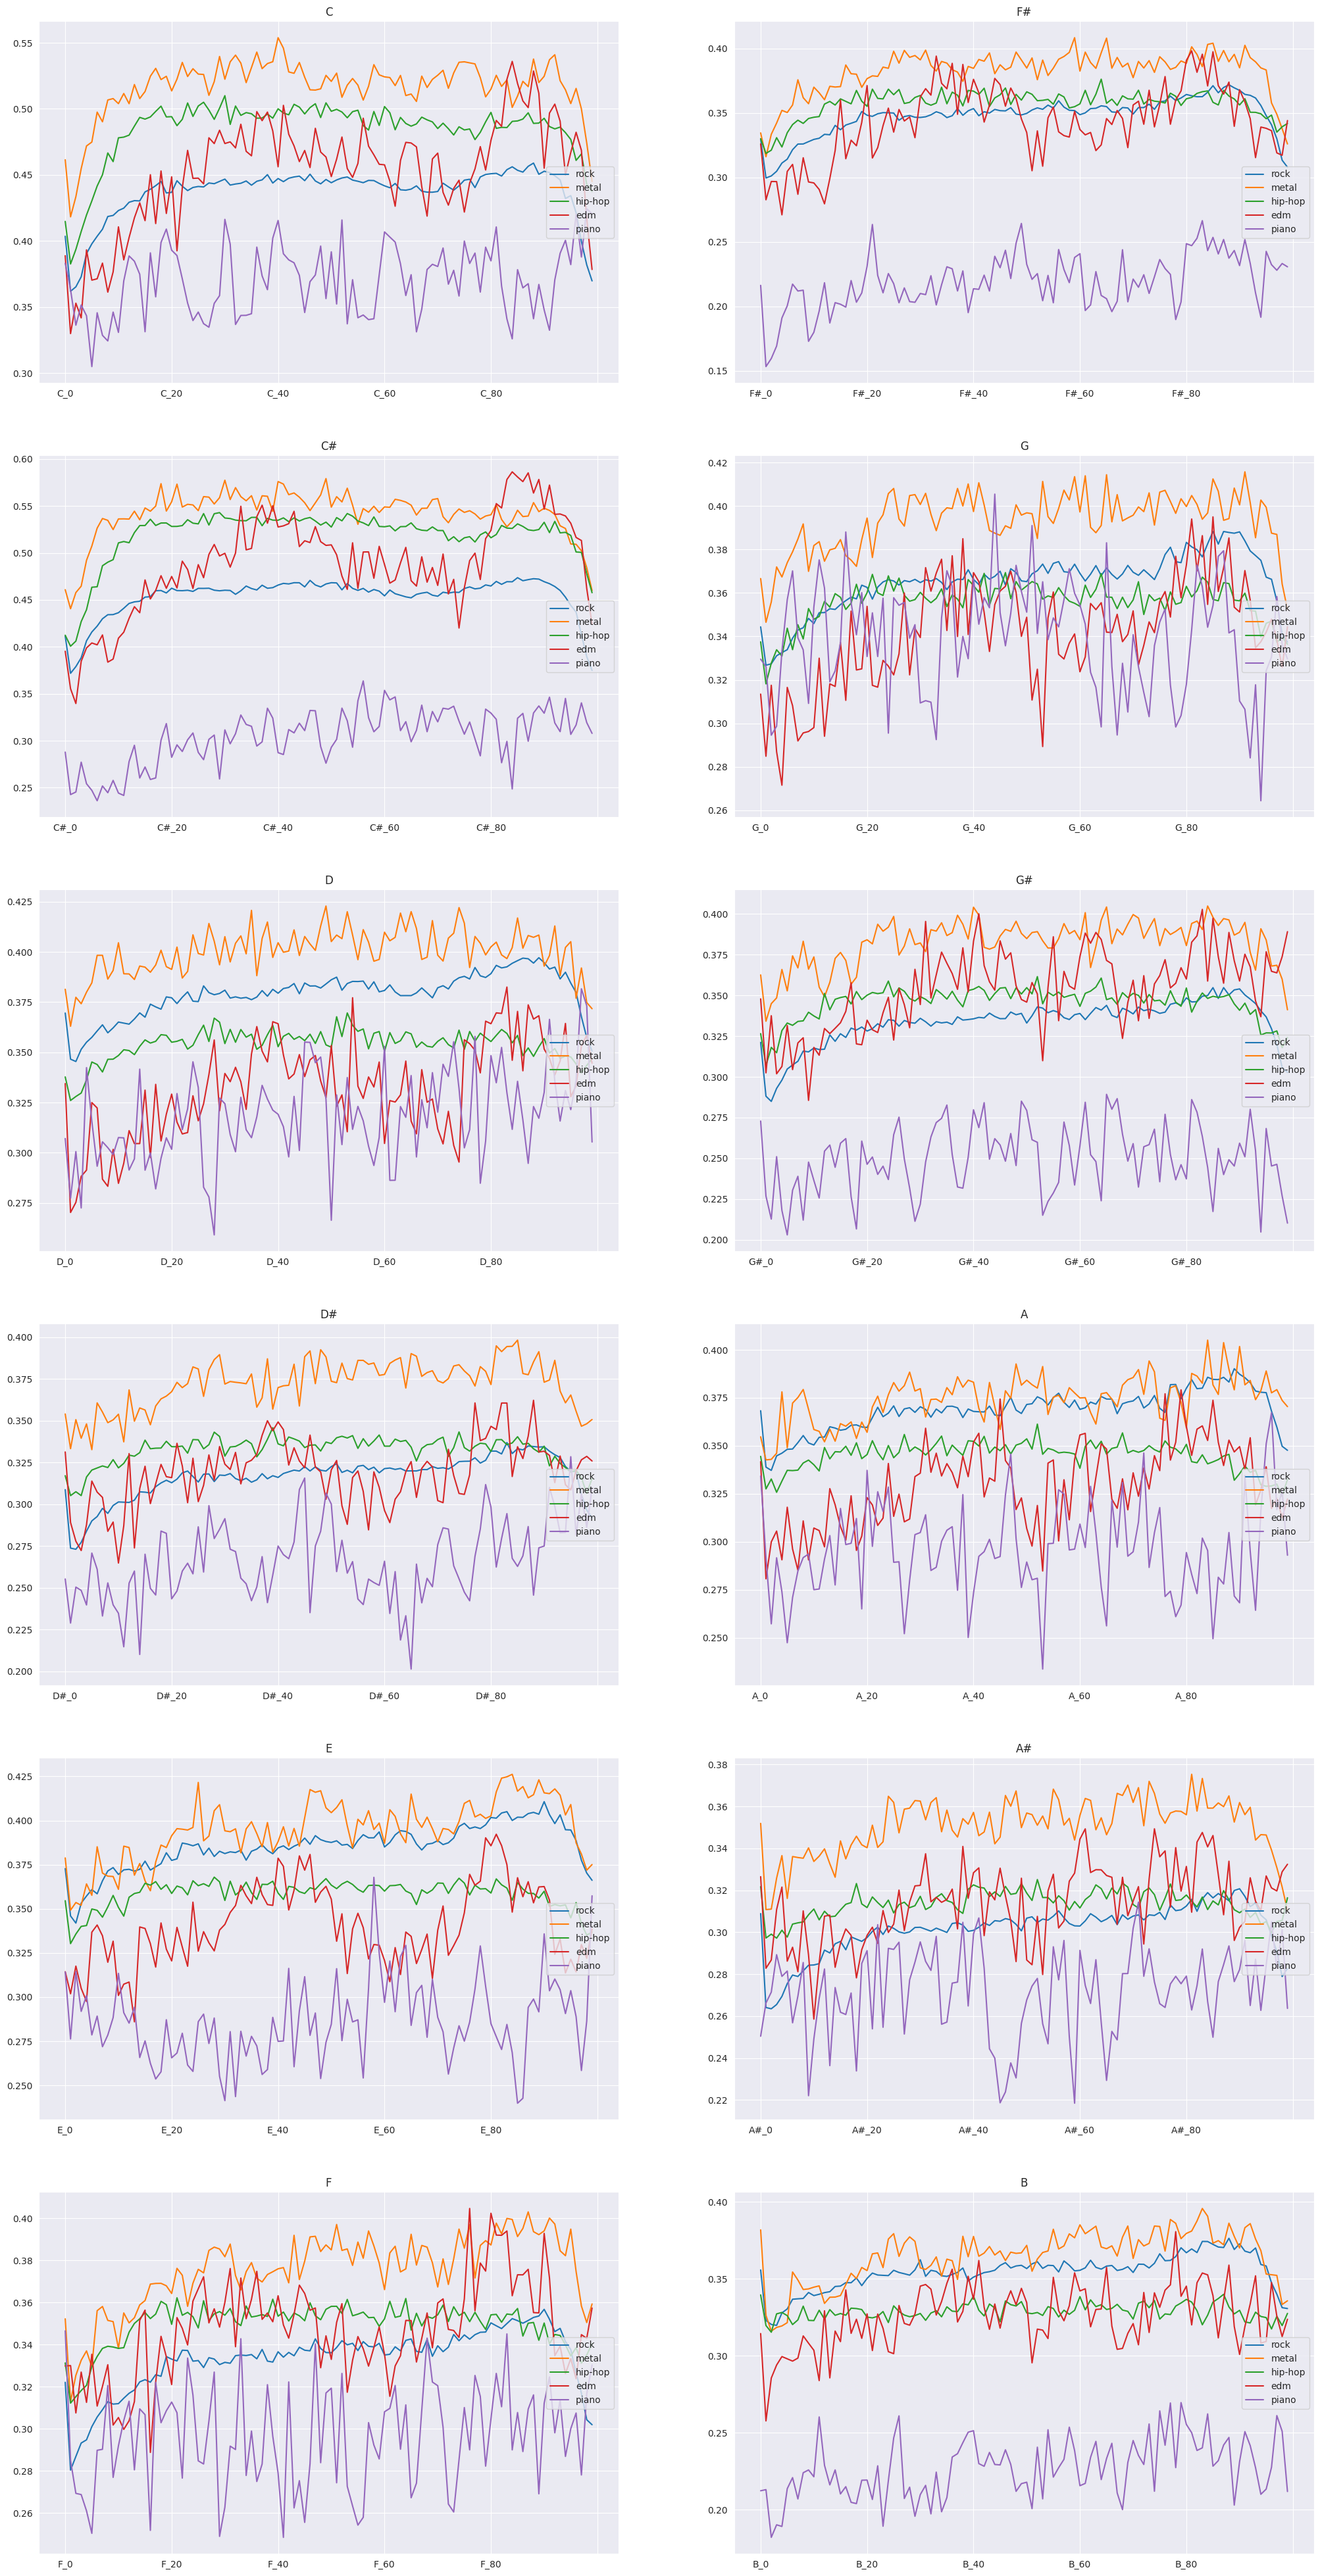

In [25]:
fig, ax = plt.subplots(len(pitch_symbol) // 2, 2, figsize=(25, 50))

for i, note in enumerate(pitch_symbol):
    cur_ax = ax[i % (len(pitch_symbol) // 2)][i // (len(pitch_symbol) // 2)]
    cur_ax.set_title(note)
    cur_ax.legend([*df_by_tags.keys()])
    for key, val in df_by_tags.items():
        curr_df = val[[*[note + "_" + str(i) for i in range(0, 100)]]].mean().transpose()
        curr_df.plot(ax=cur_ax, legend=False)

for i in ax:
    for axis in i:
        axis.legend([*df_by_tags.keys()], loc="center right")

## Spotify features

Here we decided to check if we could maybe differentiate our selected tags by plotting the boxplot of the spotify features for our selected tags.
But as we can see, most of them have a high spread and overlap, so we do not think that they are very helpful.

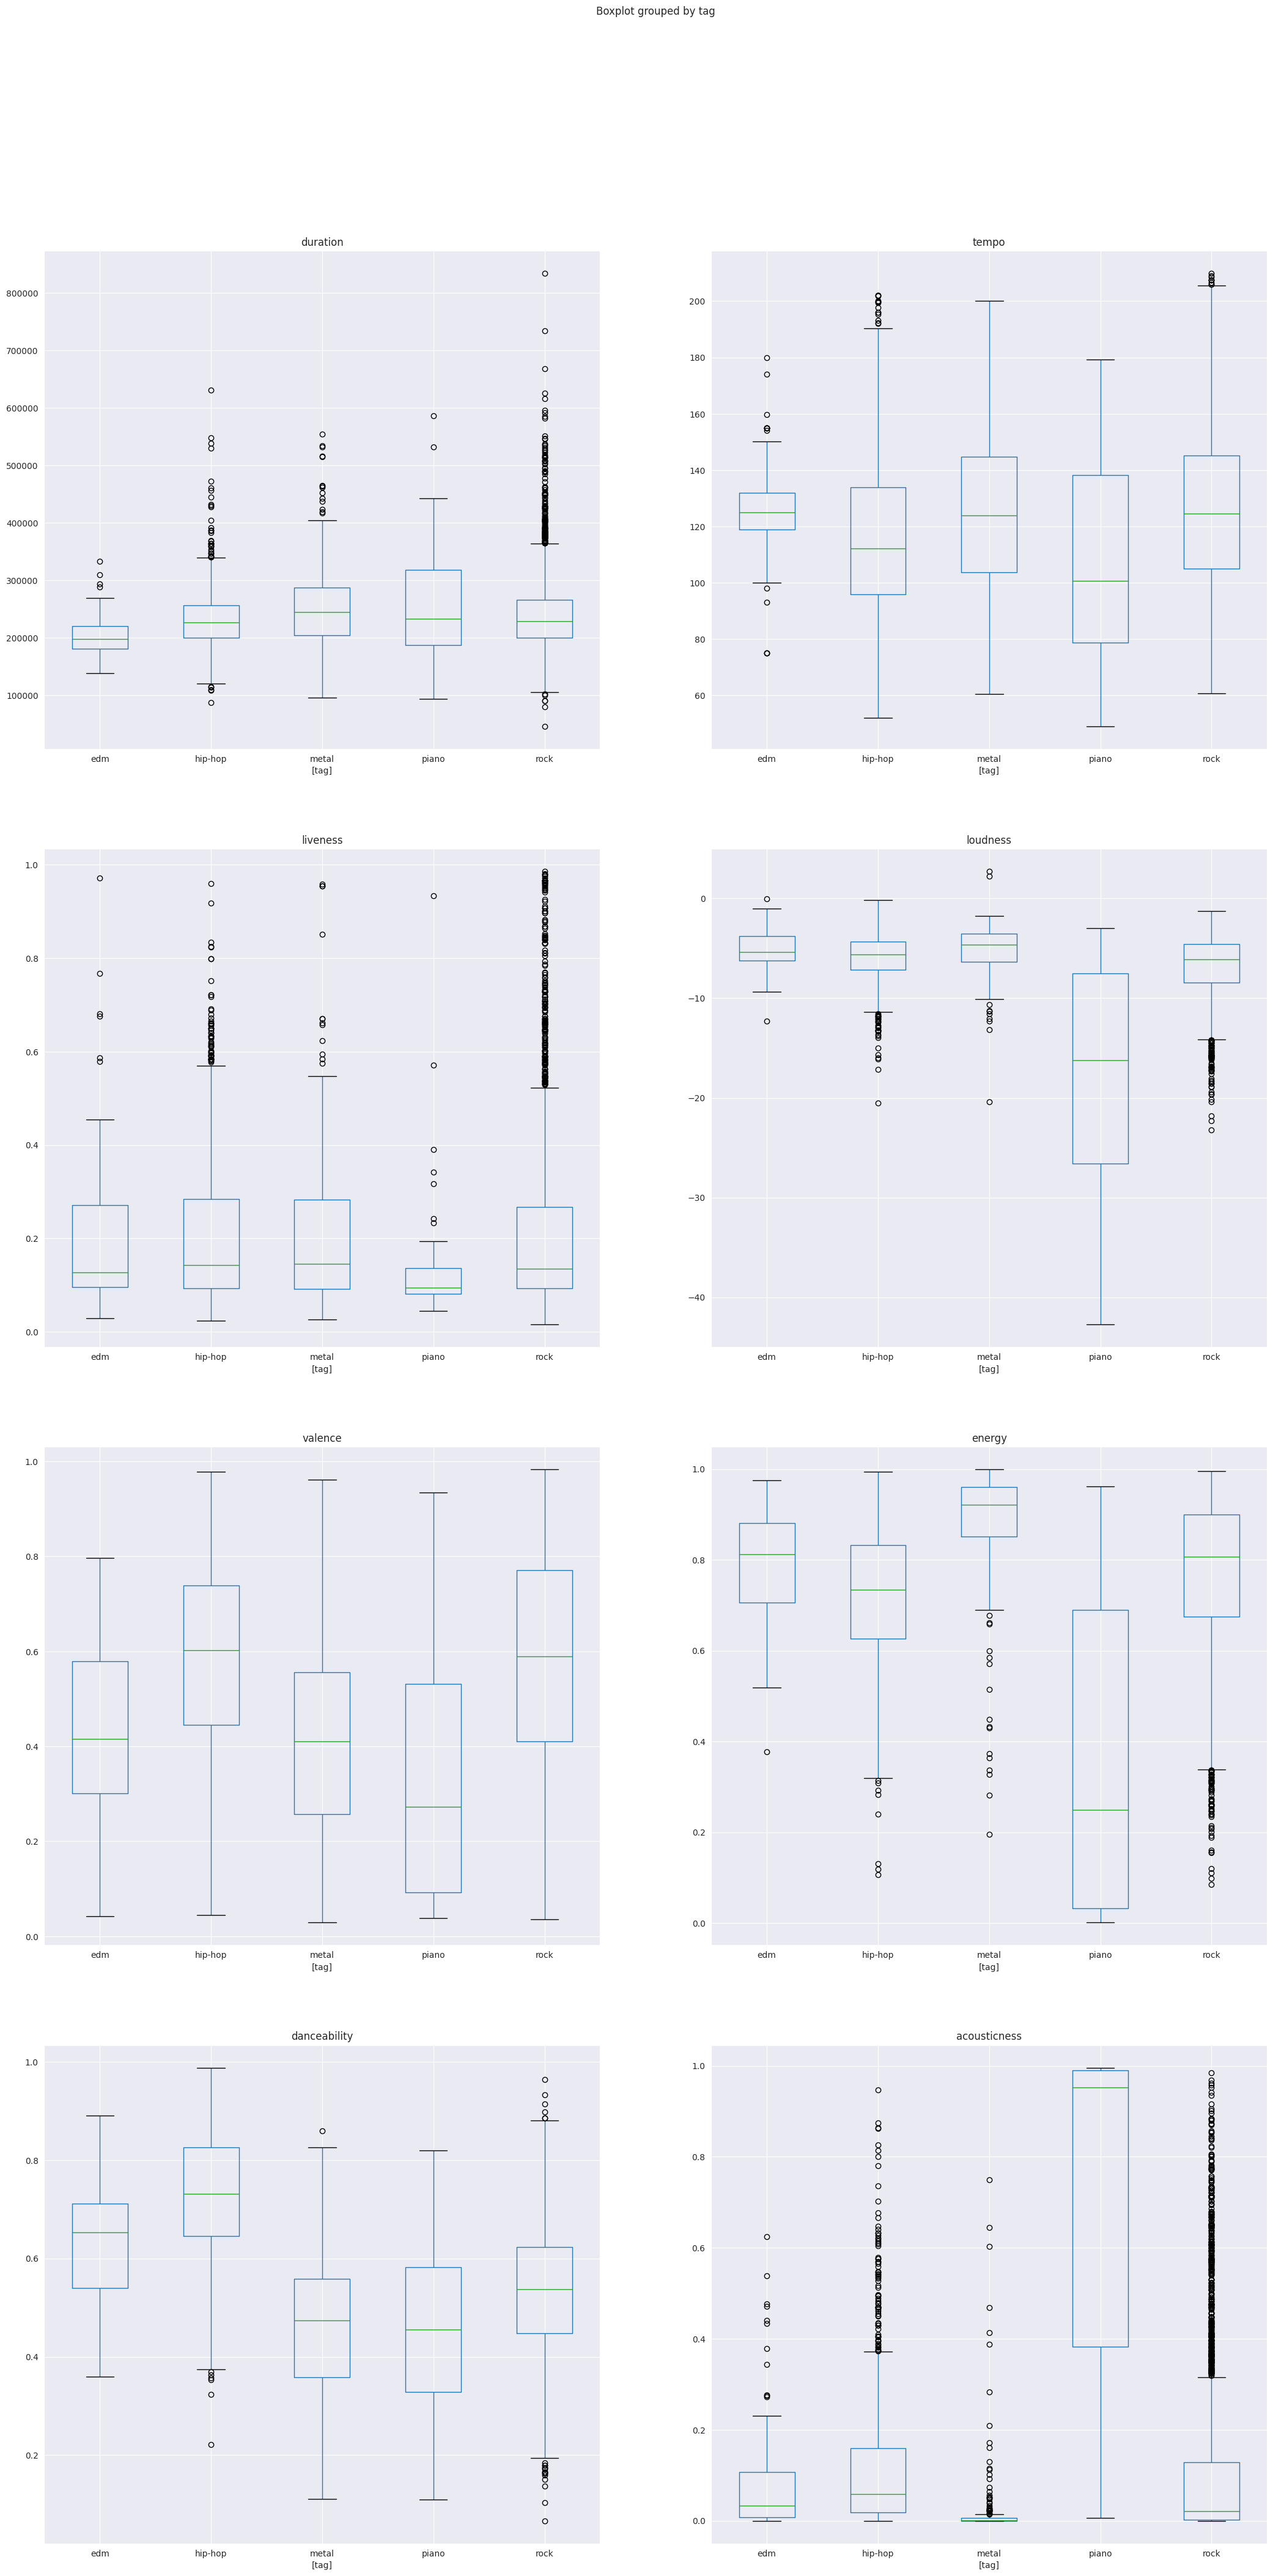

In [26]:
spotify_features = ['duration', 'liveness', 'valence', 'danceability', 'tempo', 'loudness', 'energy',
                    'acousticness']

fig, ax = plt.subplots(len(spotify_features) // 2, 2, figsize=(25, 50))

spotify_feature_df = pd.concat([
    df_by_tags["rock"].assign(tag="rock"),
    df_by_tags["metal"].assign(tag="metal"),
    df_by_tags["hip-hop"].assign(tag="hip-hop"),
#    df_by_tags["jazz"].assign(tag="jazz"),
#    df_by_tags["electro"].assign(tag="electro"),
#    df_by_tags["indie"].assign(tag="indie"),
    df_by_tags["edm"].assign(tag="edm"),
#    df_by_tags["classic"].assign(tag="classic"),
    df_by_tags["piano"].assign(tag="piano"),
])

for i, feature in enumerate(spotify_features):
    cur_ax = ax[i % (len(spotify_features) // 2)][i // (len(spotify_features) // 2)]
    cur_ax.set_title(feature)
    spotify_feature_df[["tag", feature]].boxplot(ax=cur_ax, by="tag")

## Songs per Tag

By counting the number of times a tag appears, we can see that we have an incredibly imbalanced dataset.
We think that this will mean that our classifier will try to tag most things with pop as it is by far the tag that appears the most often.
In the plot we already decided to filter out all tags that appear less than 250 times as they add no real information to the graph.

<class 'pandas.core.series.Series'>
Index: 6 entries, misc to piano
Series name: None
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 96.0+ bytes

Top 20 appearing genres
misc       11075
rock        3701
hip-hop      986
metal        227
edm           87
piano         57
dtype: int64


Text(0.5, 1.0, 'Number of songs tagged with x')

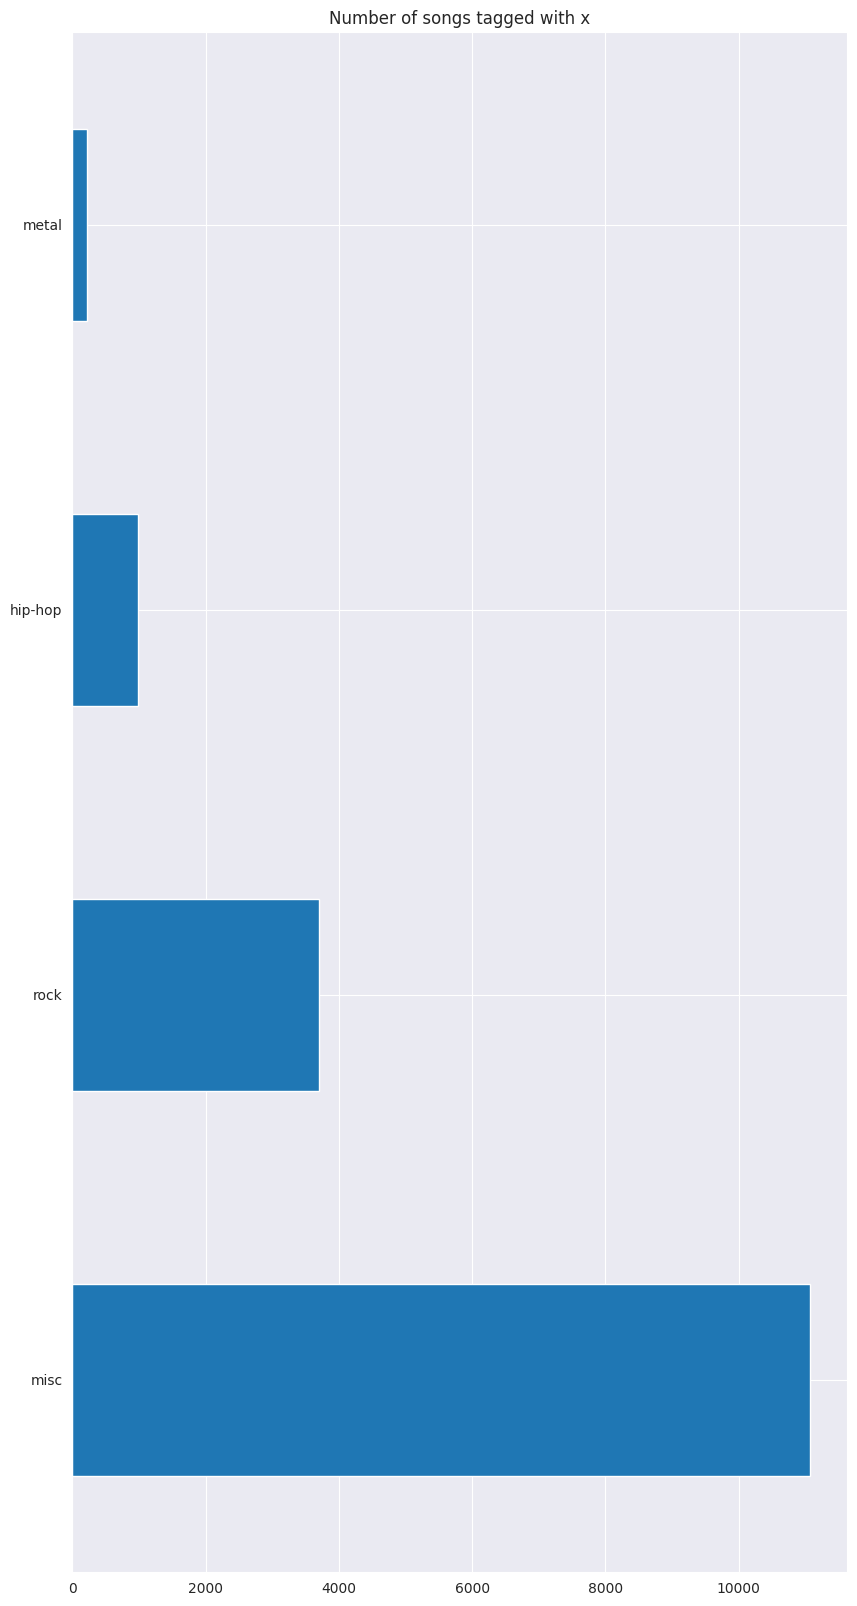

In [27]:
flatmap = lambda list_of_lists: [item for l in list_of_lists for item in l]
tags = pd.Series(flatmap(df["tags"].values.tolist()))
counts = tags.value_counts()
counts.info()
print()
print("Top 20 appearing genres")
print(counts[:20])
counts[counts > 150].plot.barh(figsize=(10, 20))
plt.title("Number of songs tagged with x")

In [134]:
from sklearn.metrics import multilabel_confusion_matrix
def confusion_matrix(y_true, y_actual):
    mats = multilabel_confusion_matrix(y_true=y_true, y_pred=y_actual)
    fig, axs = plt.subplots(nrows=len(mats)//2, ncols=2, figsize=(10, 15))
    fig.tight_layout(pad=3)
    plot_labels = mlb.inverse_transform(np.array([[1, 1, 1, 1, 1, 1]]))[0]
    for idx, mat in enumerate(mats):
        axs[idx//2,idx % 2].set_title(plot_labels[idx])
        axs[idx//2,idx % 2].xaxis.tick_top()
        mat_df = pd.DataFrame(mat, index=[i for i in ["Positive", "Negative"]], columns=[i for i in ["Positive", "Negative"]])
        sns.heatmap(mat_df, annot=True, ax=axs[idx//2,idx % 2])
    plt.show()

# Feature Selection

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

# Create the MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform([*df['tags']])

X = df.drop(columns=['tags', 'artist_names', 'name', "artist_genres"])

scaler = StandardScaler()
X = scaler.fit_transform(X)
#for index, item in enumerate(artist_genres):
#    X['artist_genres'].iloc[index] = item
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=234634754)  # 70/30 split

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [94]:
import numpy as np
from collections import Counter
from sklearn.utils import class_weight
flat_labels = [label for sublist in df['tags'] for label in sublist]
label_counts = Counter(flat_labels)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(flat_labels), y=flat_labels)
class_weights_dict = dict(zip(np.unique(flat_labels), class_weights))

# Create a list of class weight dictionaries for each label
class_weights_list = []
for i in range(y.shape[1]):
    label_column = y[:,i]
    label_counts = Counter(label_column)
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(label_column), y=label_column)
    class_weights_list.append(dict(zip(np.unique(label_column), class_weights)))
class_weights_list

[{0: 0.5039488017429193, 1: 63.810344827586206},
 {0: 0.5487298606306217, 1: 5.630324543610548},
 {0: 0.5104358219933799, 1: 24.455947136563875},
 {0: 198.26785714285714, 1: 0.5012641083521445},
 {0: 0.5025801195002716, 1: 97.39473684210526},
 {0: 0.75, 1: 1.5}]

## KNN Model

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=[{
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree'],
        'leaf_size': [1, 3],
        'p': [1, 2, 4],
        'metric': ['manhattan', 'cosine', 'euclidean'],
    }],
    n_jobs=-1
)

# Fit the pipeline to the training data
knn.fit(X_train_pca, y_train)
knn.best_params_

/home/florian/projects/fh/mc/ml/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/home/florian/projects/fh/mc/ml/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/florian/projects/fh/mc/ml/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 207, in fit
    return self._fit(X, y)
  File "/home/florian/projects/fh/mc/ml/venv/lib/python3.10/site-packages/sklearn/neighbors/_base.py", li

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'metric': 'euclidean',
 'p': 1,
 'weights': 'distance'}

In [54]:
# Use the trained model to predict the tags for the new songs
predicted_tags = knn.predict(X_test_pca)
predicted_tags_inversed = mlb.inverse_transform(predicted_tags)

In [51]:
predicted_tags_inversed

[('misc', 'rock'),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc', 'rock'),
 ('hip-hop', 'misc'),
 ('misc', 'rock'),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc',),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('hip-hop', 'mi

KNN
Accuracy: 0.49
Precision: 0.90
Recall: 0.69
F1-score: 0.76


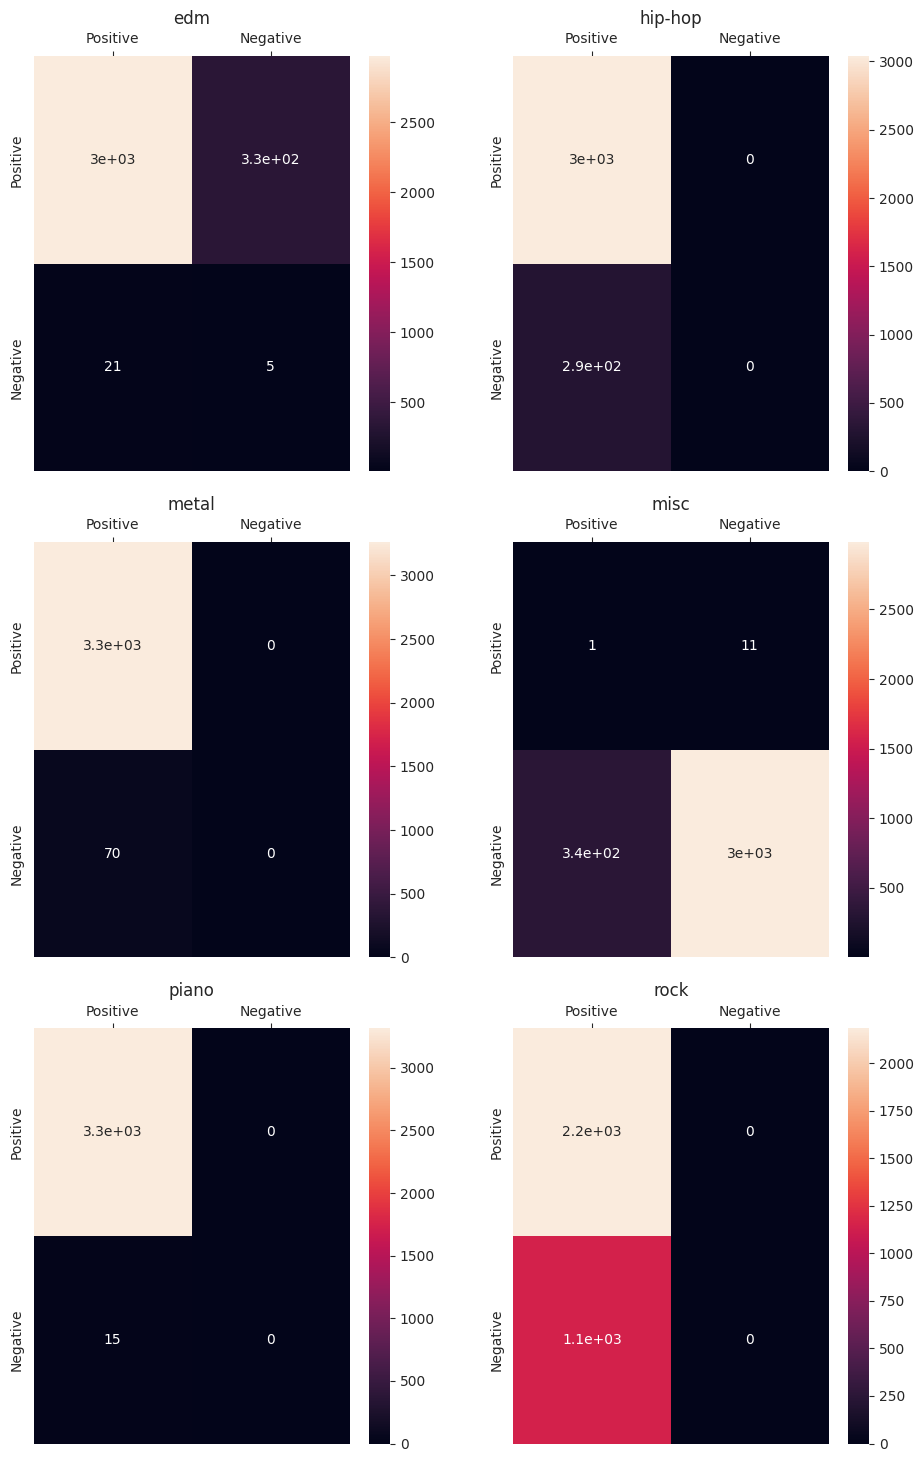

In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = predicted_tags
print("KNN")
# Get the predicted labels

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(acc))

# Calculate the precision
pre = precision_score(y_test, y_pred, average="samples", zero_division=False)
print("Precision: {:.2f}".format(pre))

# Calculate the recall
rec = recall_score(y_test, y_pred, average="samples")
print("Recall: {:.2f}".format(rec))

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average="samples")
print("F1-score: {:.2f}".format(f1))

confusion_matrix(y_test, y_pred)

## Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
tree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=[{
        'criterion': ['gini'],
        'splitter': ['best', 'random'],
        'max_depth': [1, 2, 8, 16, 48],
        'min_samples_leaf': [1, 10, 30],
        'min_weight_fraction_leaf': [0.0, 0.0001, 0.0001**10],
        'max_features': [None, 'sqrt', 'log2'],
        'max_leaf_nodes': [None, 10, 100, 1000],
        'min_impurity_decrease': [0.0, 0.0001, 0.0001**10],
        'class_weight': [class_weights_list, None],
        'ccp_alpha': [0.0, 0.0001, 0.0001**10]
    }],
    n_jobs=-1
)
tree.fit(X_train_pca, y_train)
tree.best_params_

{'ccp_alpha': 1.0000000000000005e-40,
 'class_weight': [{0: 0.5039488017429193, 1: 63.810344827586206},
  {0: 0.5487298606306217, 1: 5.630324543610548},
  {0: 0.5104358219933799, 1: 24.455947136563875},
  {0: 198.26785714285714, 1: 0.5012641083521445},
  {0: 0.5025801195002716, 1: 97.39473684210526},
  {0: 0.75, 1: 1.5}],
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 1.0000000000000005e-40,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0001,
 'splitter': 'best'}

In [100]:
# Use the trained model to predict the tags for the new songs
predicted_tags = tree.predict(X_test_pca)
predicted_tags_inversed = mlb.inverse_transform(predicted_tags)

In [74]:
predicted_tags_inversed

[('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('hip-hop', 'misc'),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',

Decision Tree
Accuracy: 0.49
Precision: 0.90
Recall: 0.69
F1-score: 0.76


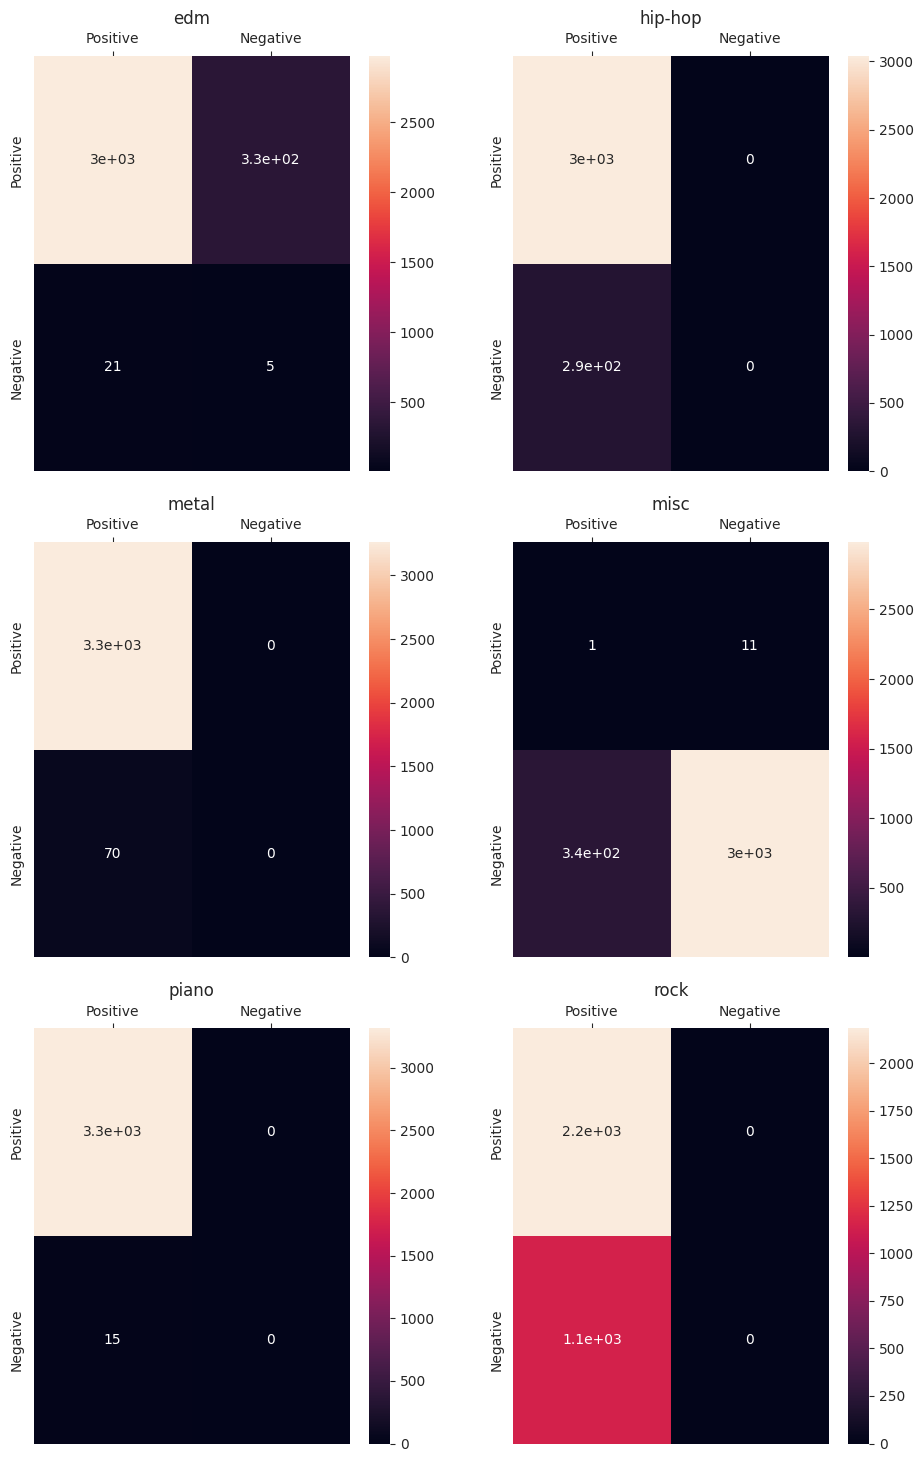

In [133]:
y_pred = predicted_tags
print("Decision Tree")
# Get the predicted labels

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(acc))

# Calculate the precision
pre = precision_score(y_test, y_pred, average="samples", zero_division=False)
print("Precision: {:.2f}".format(pre))

# Calculate the recall
rec = recall_score(y_test, y_pred, average="samples")
print("Recall: {:.2f}".format(rec))

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average="samples")
print("F1-score: {:.2f}".format(f1))

confusion_matrix(y_test, y_pred)

In [136]:
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(150,150,150), (100,100,100), (150,200,150)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'learning_rate_init': [0.01, 0.001, 0.0001],
}
mlp = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=5, verbose=2)
mlp.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50, 50, 50), (100, 100, 100),
                                                (50, 100, 50)],
                         'learning_rate_init': [0.01, 0.001, 0.0001],
                         'solver': ['adam', 'lbfgs']})

In [141]:
# Use the trained model to predict the tags for the new songs
predicted = mlp.predict(X_test)
mlp.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'learning_rate_init': 0.0001,
 'solver': 'lbfgs'}

In [138]:
mlb.inverse_transform(predicted)

[('misc', 'rock'),
 ('misc', 'rock'),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('hip-hop', 'misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc', 'rock'),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc', 'rock'),
 ('misc',),
 ('misc', 'rock'),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc', 'rock'),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc', 'rock'),
 ('misc',),
 ('misc',),
 ('hip-hop', 'misc'),
 (

Accuracy: 0.57
Precision: 0.90
Recall: 0.87
F1-score: 0.85


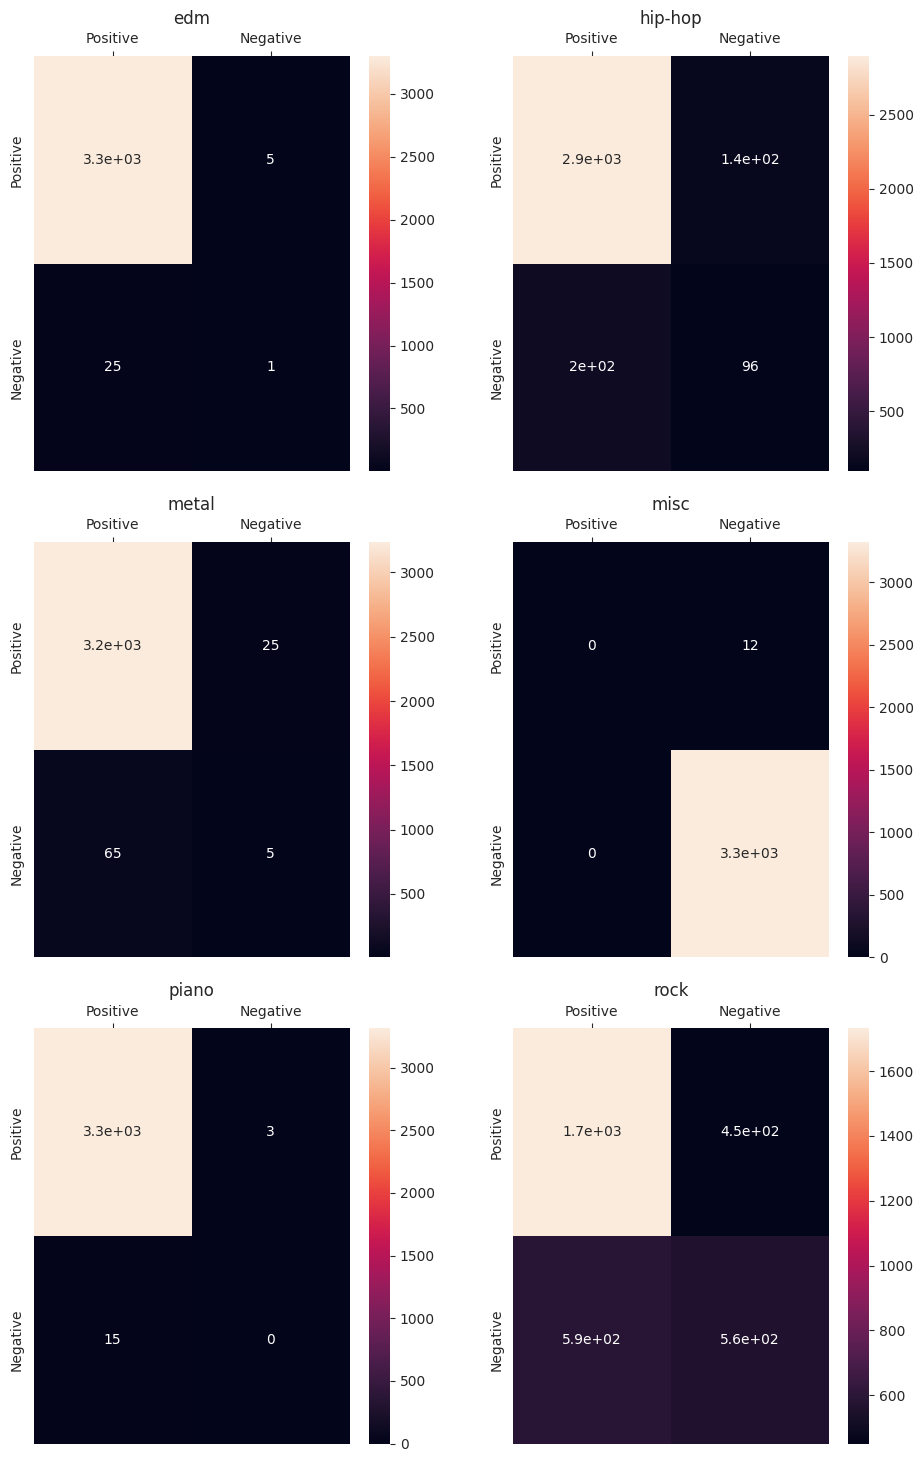

In [139]:
# Calculate the accuracy
y_pred = predicted
acc = accuracy_score(y_test, predicted)
print("Accuracy: {:.2f}".format(acc))

# Calculate the precision
pre = precision_score(y_test, predicted, average="samples", zero_division=False)
print("Precision: {:.2f}".format(pre))

# Calculate the recall
rec = recall_score(y_test, predicted, average="samples")
print("Recall: {:.2f}".format(rec))

# Calculate the F1-score
f1 = f1_score(y_test, predicted, average="samples")
print("F1-score: {:.2f}".format(f1))
confusion_matrix(y_test, y_pred)

In [142]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rfc = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=2)
rfc.fit(X_train, y_train)
rfc.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  23.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  25.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  24.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  22.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  23.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  52.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  50.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2,

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

Accuracy: 0.59
Precision: 0.99
Recall: 0.80
F1-score: 0.86


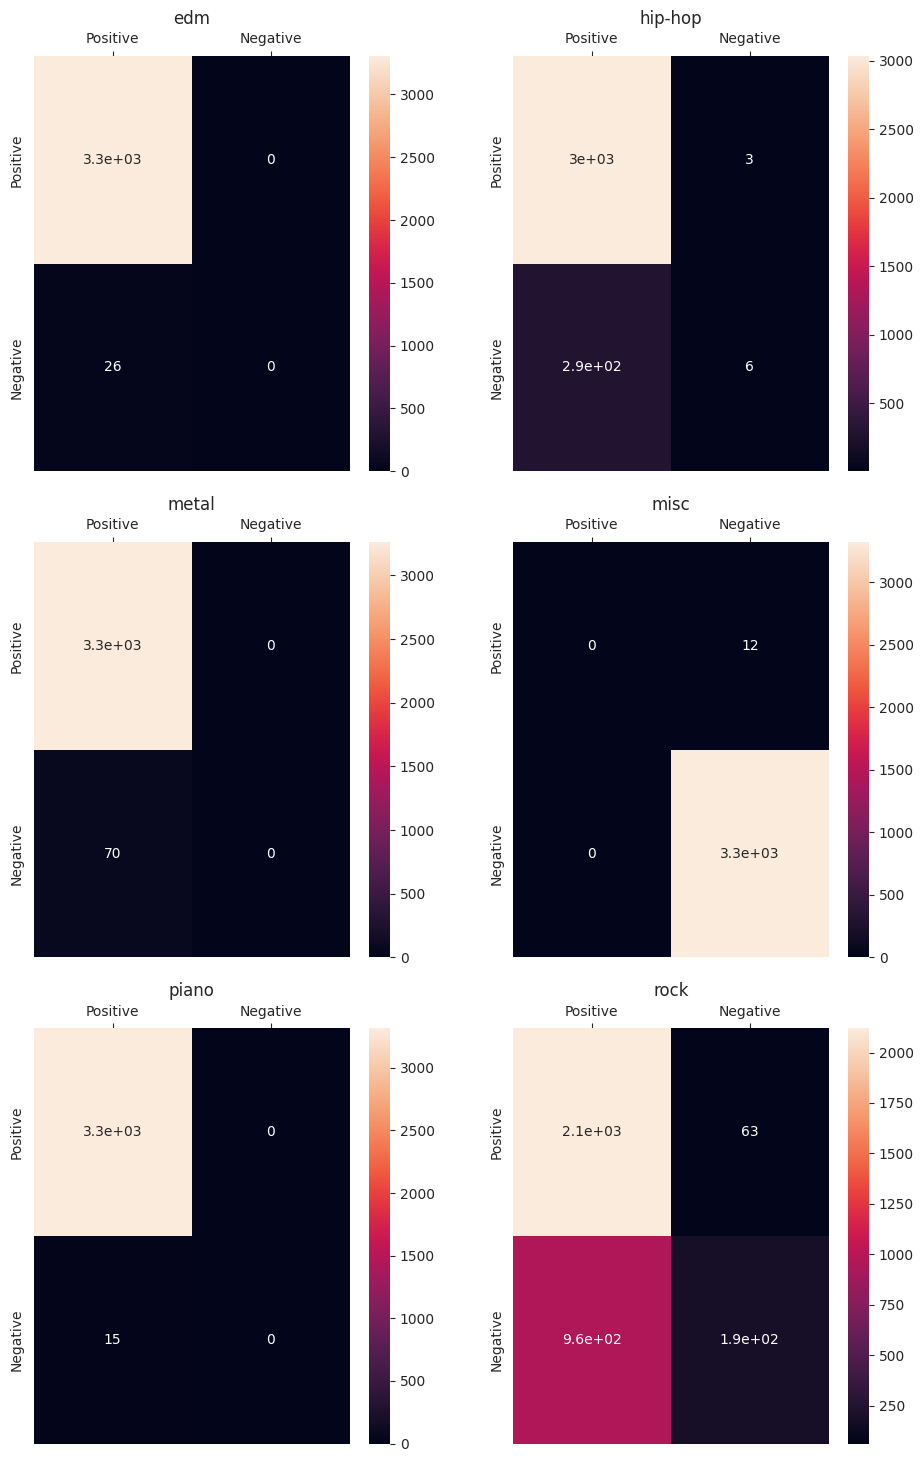

In [143]:
predicted = rfc.predict(X_test)
# Calculate the accuracy
y_pred = predicted
acc = accuracy_score(y_test, predicted)
print("Accuracy: {:.2f}".format(acc))

# Calculate the precision
pre = precision_score(y_test, predicted, average="samples", zero_division=False)
print("Precision: {:.2f}".format(pre))

# Calculate the recall
rec = recall_score(y_test, predicted, average="samples")
print("Recall: {:.2f}".format(rec))

# Calculate the F1-score
f1 = f1_score(y_test, predicted, average="samples")
print("F1-score: {:.2f}".format(f1))
confusion_matrix(y_test, y_pred)